In this document, the data about healthcare is analyzed. This dataset contains over 55,000 records of hospital patients. We aim to analyze disease patterns, costs, and outcomes based on demographics, admission type, and insurance coverage. The datasets can be found here.

https://www.kaggle.com/datasets/prasad22/healthcare-dataset/data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\Arul\Documents\Scripts\Python Scripts\Self_Project\healthcare_dataset.csv')

df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


## First Question

What is the most prevalent medical condition?

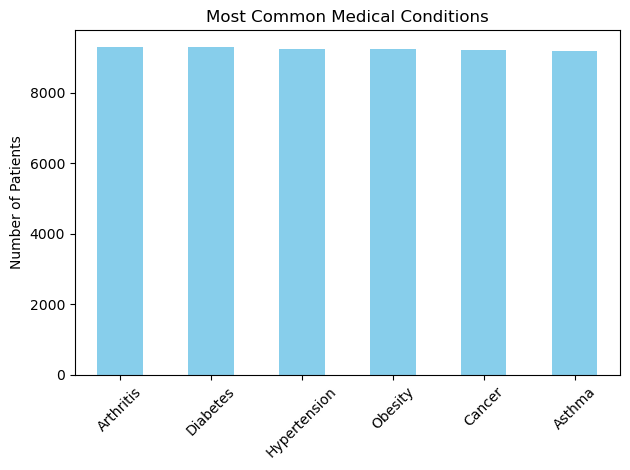

In [4]:
df['Medical Condition'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Most Common Medical Conditions')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the chart above, it can be seen that the amount of diseases treated are similar. 

Then, we compare the total of medical condition between various ages and gender.

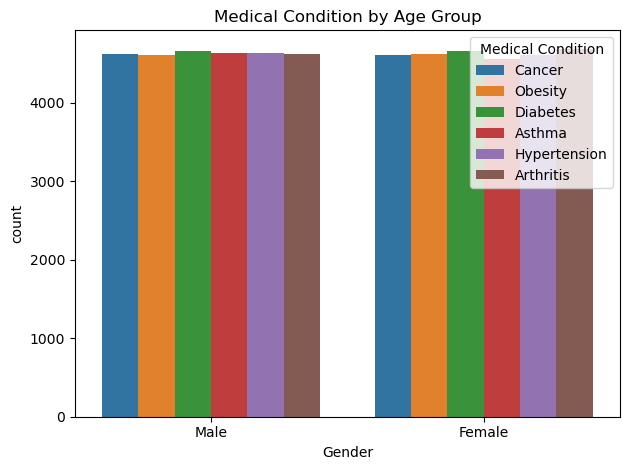

In [66]:
sns.countplot(data=df, x='Gender', hue='Medical Condition')
plt.title('Medical Condition by Age Group')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Based on the bar chart above, the medical conditions are uniformly distributed between gender

<Axes: xlabel='Age', ylabel='Count'>

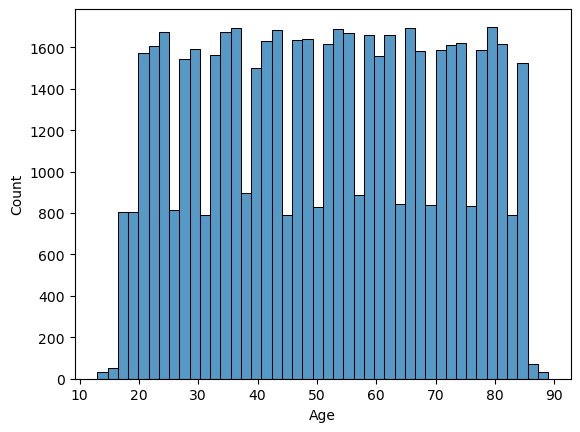

In [9]:
sns.histplot(df['Age'])

To analyze the distribution on medical condition based on age, we group the age based on these category

* Adolescent: 12-19 years old
* Adult: 20-65 years old
* Aged: 66-80 years old
* 80 and Over: Over 80 years old

In [34]:
df['Age Groups'] = df['Age']

n = df.shape[0]
for i in range(n):
    if df['Age'][i] <= 19:
        df['Age Groups'][i] = 'Adolescent'
    elif df['Age'][i] <= 65:
        df['Age Groups'][i] = 'Adult'
    elif df['Age'][i] <= 80:
        df['Age Groups'][i] = 'Aged'
    else:
        df['Age Groups'][i] = '80 and Over'

df['Age Groups'].value_counts()

Adult          37557
Aged           12215
80 and Over     4035
Adolescent      1693
Name: Age Groups, dtype: int64

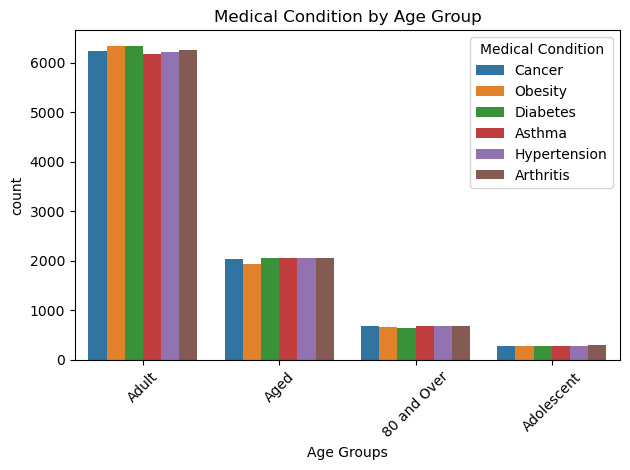

In [62]:
sns.countplot(data=df, x='Age Groups', hue='Medical Condition')
plt.title('Medical Condition by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on these bar charts, the distribution of medical conditions is uniform for every age.